# Exploring the Titanit data with Altair

In [1]:
import seaborn as sns
data = sns.load_dataset('titanic')
data.head()

/Users/jakevdp/anaconda/envs/python3.5/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
from altair import *

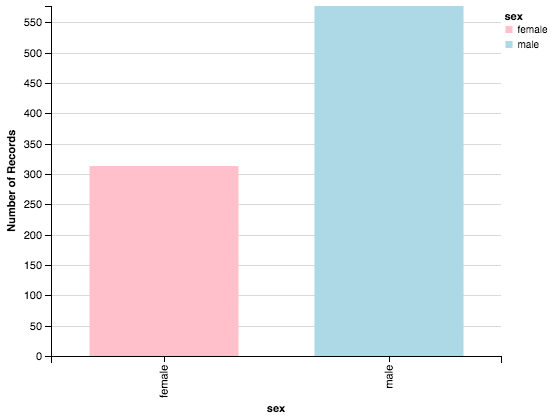

In [3]:
gender = Color('sex:N', scale=Scale(range=["pink", "lightblue"]))

Chart(data).mark_bar().encode(
    x='sex',
    y='count(*)',
    color=gender, 
).configure_scale(bandSize=150)

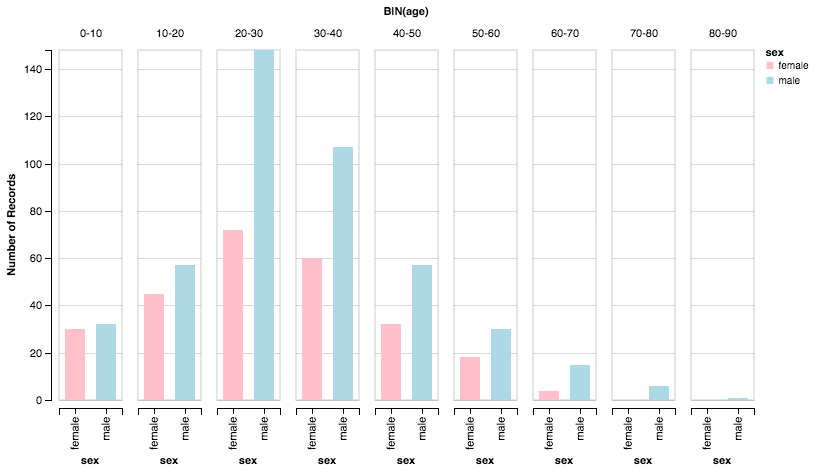

In [4]:
Chart(data).mark_bar().encode(
    x='sex',
    y='count(*)',
    color=gender,
    column=Column('age', bin=Bin(step=10)),
)

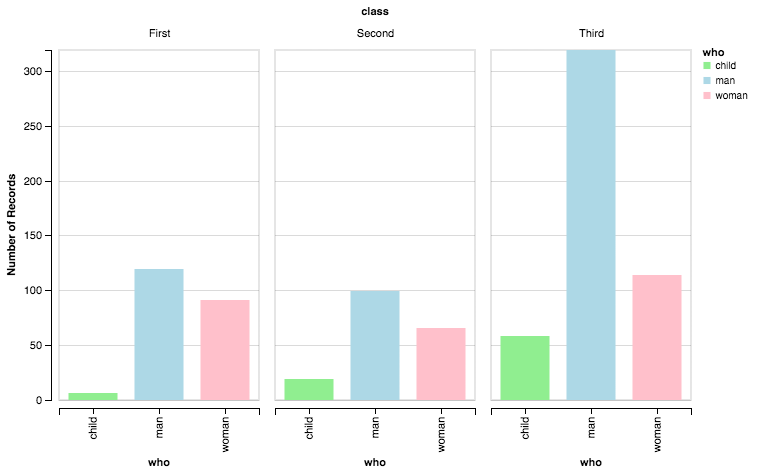

In [5]:
man_woman_child = Color('who', scale=Scale(range=['lightgreen', "lightblue",  "pink"]))

Chart(data).mark_bar().encode(
    x='who',
    y='count(*)',
    column='class',
    color=man_woman_child, 
).configure_scale(bandSize=50)

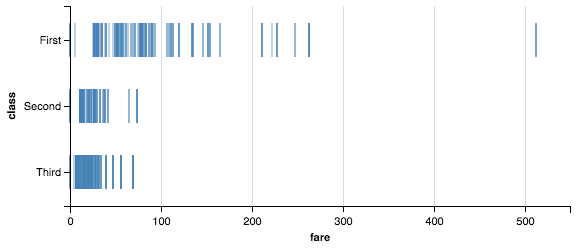

In [6]:
Chart(data).mark_tick().encode(
    x='fare',
    y='class',
).configure_scale(bandSize=50)

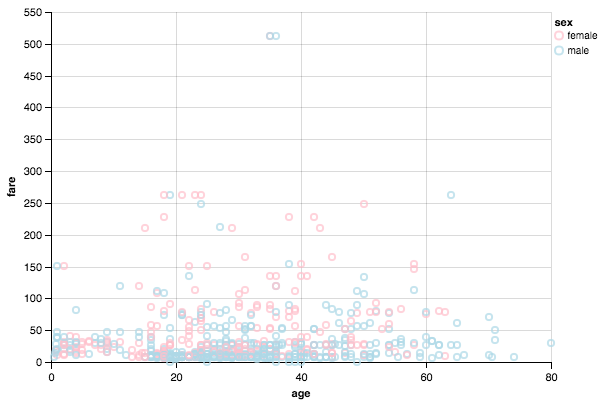

In [7]:
Chart(data).mark_point().encode(
    x='age',
    y='fare',
    color=gender,
)

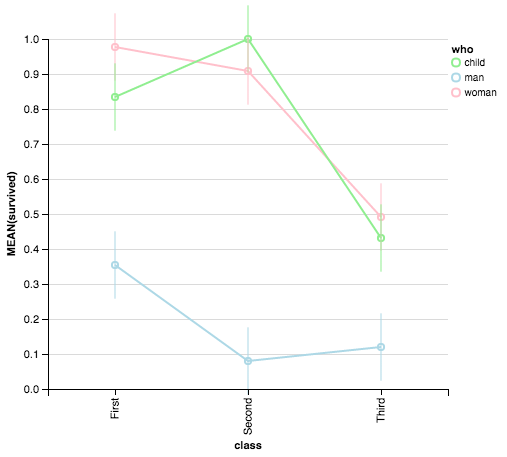

In [8]:
chart1 = Chart().mark_line().encode(x='class:O', y='mean(survived):Q', color=man_woman_child)
chart2 = Chart().mark_point().encode(x='class:O', y='mean(survived):Q', color=man_woman_child)
chart3 = Chart().mark_tick(orient='vertical').encode(x='class:O', y='mean(survived):Q', color=man_woman_child)

LayeredChart(data, layers=[chart1, chart2, chart3]).configure_scale(bandSize=100)

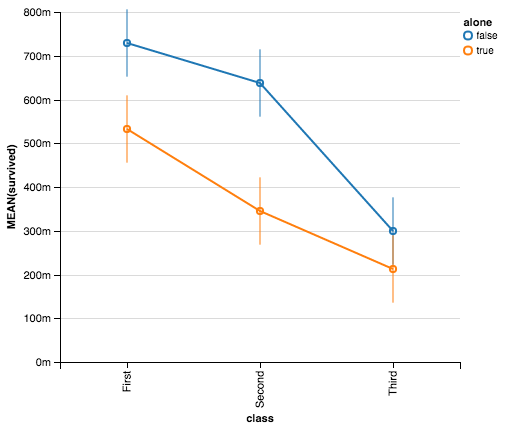

In [9]:
chart1 = Chart().mark_line().encode(x='class:O', y='mean(survived):Q', color='alone:N')
chart2 = Chart().mark_point().encode(x='class:O', y='mean(survived):Q', color='alone:N')
chart3 = Chart().mark_tick(orient='vertical').encode(x='class:O', y='mean(survived):Q', color='alone:N')

LayeredChart(data, layers=[chart1, chart2, chart3]).configure_scale(bandSize=100)